In [1]:

# лучший вариант на данный момент
# /home/jupyter/datasphere/project/model_training/train_with_wandb/train2/optimizer=AdamW batch=384 lr0=0.005 lrf=0.2 cos_lr=True dropout=0.3 warmup_epochs=7 weight_decay=0.01 close_mosaic=10 Second dataset 3/weights/best.pt
# optimizer=AdamW batch=384 lr0=0.005 lrf=0.2 cos_lr=True dropout=0.3 warmup_epochs=7 weight_decay=0.01 close_mosaic=10 Second dataset 3


# Обучение YOLO. Логгирование с помощью ClearML

## Зависимости

In [2]:
from ultralytics import YOLO
from clearml import Task

In [3]:
from ultralytics import settings
settings.update({
    'wandb': False,  # отключает логирование в Weights & Biases
    'hub': False     # отключает Ultralytics HUB
})

## Подготовка к логгированию

In [4]:
Task.set_credentials(
    api_host="https://api.clear.ml",
    web_host="https://app.clear.ml",
    files_host="https://files.clear.ml",
    key="2MMVONLRI2E6K5Y2B14O71ETPLAWGC",
    secret="BYoLMF8yyVCRWniQrApP5igcXEqnQPNBV_b3BQzflNJ_JY4nu37QzUloR1a8t5bXKuU"
)

In [5]:
# Прошедшие тесты:
# 1) optimizer=Adam batch=128 lr0=0.0024 lrf=0.1 cos_lr=True dropout=0
# 2) optimizer=AdamW batch=128 lr0=0.0024 lrf=0.1 cos_lr=True dropout=0
# 3) optimizer=AdamW batch=128 lr0=0.0048 lrf=0.1 cos_lr=True dropout=0 warmup_epochs=7
# 4) optimizer=AdamW batch=128 lr0=0.0048 lrf=0.25 cos_lr=True dropout=0 warmup_epochs=7 weight_decay=0.0015
# 5) optimizer=AdamW batch=256 lr0=0.001697056274847714 lrf=0.25 cos_lr=True dropout=0 warmup_epochs=4 weight_decay=0.002
# 6) optimizer=SGD batch=256 lr0=0.016970562748477143 lrf=0.25 cos_lr=True dropout=0 warmup_epochs=4 weight_decay=0.001
# 7) optimizer=SGD batch=256 lr0=0.008485281374238571 lrf=0.3 cos_lr=True dropout=0 warmup_epochs=4 weight_decay=0.001 close_mosaic=0
# 8) optimizer=AdamW batch=256 lr0=0.001697056274847714 lrf=0.3 cos_lr=True dropout=0.3 warmup_epochs=4 weight_decay=0.001 close_mosaic=0
# 9) optimizer=AdamW batch=256 lr0=0.003 lrf=0.3 cos_lr=True dropout=0.2 warmup_epochs=4 weight_decay=0.01 close_mosaic=0

## Переменные

### Пути и названия

In [6]:
#data="/home/jupyter/datasphere/project/model_training/sharedDateFile.yaml"
data="/home/jupyter/datasphere/datasets/dataset_common_fire_smoke/data.yaml"

#pathToModel="/home/jupyter/datasphere/project/model_training/train_with_wandb/runs/detect/train5/weights/best.pt"
#pathToModel="/home/jupyter/datasphere/project/start_model/firedetect-11s.pt"

#pathToModel="/home/jupyter/datasphere/project/model_training/train_with_wandb/train2/optimizer=AdamW batch=256 lr0=0.003 lrf=0.3 cos_lr=True dropout=0.2 warmup_epochs=4 weight_decay=0.01 close_mosaic=0/weights/best.pt"
# pathToModel="/home/jupyter/datasphere/project/model_training/train_with_wandb/train2/optimizer=NAdam batch=384 lr0=0.0003 lrf=0.2 cos_lr=True dropout=0.2 warmup_epochs=7 weight_decay=0.01 close_mosaic=5 запуск 2/weights/best.pt"


pathToModel="/home/jupyter/datasphere/project/model_training/train_with_wandb/train2/optimizer=NAdam batch=384 lr0=0.0003 lrf=0.2 cos_lr=True dropout=0.2 warmup_epochs=7 weight_decay=0.01 close_mosaic=5 запуск 2/weights/best.pt"

project="train3"


### Гиперпараметры

In [7]:
epochs=60
imgsz=640
val=True
batch=128

workers=15


# lrf=1 #df: 
# lr0=1e-3
# optimizer="Adam" 

# dropout=0.0 # попробовать, если модель "стоит" (0.2-0.4)
# warmup_epochs=0 #df: 3
# weight_decay=0.0 #df: 0.0005
# patience=15 # ранняя остановка обучение, если модель patience эпох стоит на месте

# name=f"batch={batch} optimizer={optimizer} lrf={lrf} lr0={lr0} dropout={dropout} warmup_epochs={warmup_epochs} weight_decay={weight_decay} patience={patience} тест 9"
name="тест 13 "
name=name + "batch_size=256, optimizer=AdamW ,  lr0=3e-4, lrf=1, weight_decay=0.0005, patience=15, warmup_epochs = 10, warmup_momentum=0.8, dropout=0.2 Остальные параметры по умолчанию"

# теперь можно создавать задачи
task = Task.init(project_name=project, task_name=name)

print(name)

ClearML Task: created new task id=2f20c6c4dbc446b38a125bc76a73d7ec
2025-09-21 13:56:27,100 - clearml.Task - INFO - No repository found, storing script code instead


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

ClearML results page: https://app.clear.ml/projects/5921b51bb4fd46c795ba9546d6fd3e51/experiments/2f20c6c4dbc446b38a125bc76a73d7ec/output/log
тест 13 batch_size=256, optimizer=AdamW ,  lr0=3e-4, lrf=1, weight_decay=0.0005, patience=15, warmup_epochs = 10, warmup_momentum=0.8, dropout=0.2 Остальные параметры по умолчанию


       3/60      31.1G      1.296      1.271      1.346        269        640:  27% ━━━───────── 172/630 2.3it/s 1:16

[D 2025-09-21 14:20:30.338 MLKernelApp] Control received: {'header': {'msg_id': '9d1c6790-93f6-40e2-b521-c3cec826e804', 'session': '1017fa3c-f677-43ac-89b9-1a952d16d3a4', 'username': '', 'date': datetime.datetime(2025, 9, 21, 14, 20, 4, 714000, tzinfo=tzlocal()), 'msg_type': 'debug_request', 'version': '5.2'}, 'msg_id': '9d1c6790-93f6-40e2-b521-c3cec826e804', 'msg_type': 'debug_request', 'parent_header': None, 'metadata': {}, 'content': {'type': 'request', 'seq': 0, 'command': 'debugInfo'}, 'buffers': []}
[D 2025-09-21 14:20:30.339 MLKernelApp] {'header': {'msg_id': '00e736c3-747f35b41ee21d574c60d26b_5310_6604', 'msg_type': 'debug_reply', 'username': 'username', 'session': '00e736c3-747f35b41ee21d574c60d26b', 'date': datetime.datetime(2025, 9, 21, 14, 20, 30, 339588, tzinfo=datetime.timezone.utc), 'version': '5.3'}, 'msg_id': '00e736c3-747f35b41ee21d574c60d26b_5310_6604', 'msg_type': 'debug_reply', 'parent_header': {'msg_id': '9d1c6790-93f6-40e2-b521-c3cec826e804', 'session': '1017fa3c

       3/60      31.1G      1.297      1.272      1.346        296        640:  27% ━━━───────── 173/630 2.2it/s 1:17

[D 2025-09-21 14:20:30.467 MLKernelApp] Control received: {'header': {'msg_id': 'dbfc130f-b1b4-4e54-8faf-d70557ad78e9', 'session': '1017fa3c-f677-43ac-89b9-1a952d16d3a4', 'username': '', 'date': datetime.datetime(2025, 9, 21, 14, 20, 5, 42000, tzinfo=tzlocal()), 'msg_type': 'debug_request', 'version': '5.2'}, 'msg_id': 'dbfc130f-b1b4-4e54-8faf-d70557ad78e9', 'msg_type': 'debug_request', 'parent_header': None, 'metadata': {}, 'content': {'type': 'request', 'seq': 0, 'command': 'debugInfo', 'arguments': {}}, 'buffers': []}
[D 2025-09-21 14:20:30.467 MLKernelApp] {'header': {'msg_id': '00e736c3-747f35b41ee21d574c60d26b_5310_6610', 'msg_type': 'debug_reply', 'username': 'username', 'session': '00e736c3-747f35b41ee21d574c60d26b', 'date': datetime.datetime(2025, 9, 21, 14, 20, 30, 467427, tzinfo=datetime.timezone.utc), 'version': '5.3'}, 'msg_id': '00e736c3-747f35b41ee21d574c60d26b_5310_6610', 'msg_type': 'debug_reply', 'parent_header': {'msg_id': 'dbfc130f-b1b4-4e54-8faf-d70557ad78e9', 'ses

       3/60      31.1G      1.297      1.272      1.346        246        640:  32% ━━━╸──────── 199/630 2.3it/s 1:28

       3/60      31.1G       1.29      1.249      1.338         38        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.7it/s 15.1s
                   all       6275      24315      0.591      0.489      0.524      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       4/60      31.2G      1.268      1.225      1.328        298        640:  34% ━━━━──────── 215/630 2.3it/s 1:35s

       4/60      31.2G      1.264      1.219      1.325         29        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.2s
                   all       6275      24315      0.643      0.514      0.572      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       5/60      31.1G      1.247      1.193      1.306        251        640:  54% ━━━━━━────── 338/630 2.3it/s 2:29s

       5/60      31.1G      1.239      1.184      1.305         21        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.2s
                   all       6275      24315      0.684      0.588      0.662       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       6/60      31.1G      1.225      1.164      1.301        284        640:  23% ━━╸───────── 146/630 2.3it/s 1:05s

       6/60      31.1G      1.216      1.149      1.294         25        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.4s
                   all       6275      24315      0.702      0.588      0.662       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       7/60      31.1G      1.203       1.13      1.287        263        640:  32% ━━━╸──────── 204/630 2.3it/s 1:30s

       7/60      31.1G      1.197      1.118      1.278         30        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.4s
                   all       6275      24315      0.696      0.603      0.673      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       8/60      30.9G      1.185       1.11      1.277        265        640:  15% ━╸────────── 94/630 2.3it/s 41.9s

       8/60      30.9G       1.18      1.096      1.269         26        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:37s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.3s
                   all       6275      24315      0.718      0.601      0.683      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       9/60      31.2G      1.157      1.059      1.256        242        640:  22% ━━╸───────── 141/630 2.3it/s 1:02s

       9/60      31.2G      1.162      1.066      1.259         30        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.2s
                   all       6275      24315      0.711      0.612      0.689        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      10/60      31.1G      1.152      1.047      1.252        249        640:  85% ━━━━━━━━━━── 535/630 2.3it/s 3:56s

      10/60      31.1G      1.152      1.047      1.252         13        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.3s
                   all       6275      24315      0.713      0.625      0.696      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      11/60      31.2G       1.13      1.018      1.243        283        640:  58% ━━━━━━╸───── 367/630 2.3it/s 2:42s

      11/60      31.2G      1.134      1.019      1.243         36        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.2s
                   all       6275      24315      0.713      0.618      0.695      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      12/60      31.1G      1.137      1.017      1.243        271        640:  20% ━━────────── 123/630 2.3it/s 54.6s

      12/60      31.1G      1.127      1.008      1.236         27        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:36s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.2s
                   all       6275      24315      0.718      0.621      0.697      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      13/60      31.1G      1.128      1.006      1.236        274        640:  10% ━─────────── 64/630 2.3it/s 28.6s

      13/60      31.1G      1.117     0.9881      1.227         28        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:36s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.3s
                   all       6275      24315      0.713      0.625      0.696      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      14/60      31.2G      1.104     0.9728      1.223        358        640:  25% ━━╸───────── 157/630 2.3it/s 1:09s

      14/60      31.2G      1.109     0.9788      1.224         42        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.3s
                   all       6275      24315      0.718      0.624      0.697      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      15/60      31.1G      1.097     0.9618      1.221        296        640:  45% ━━━━━─────── 285/630 2.3it/s 2:06s

      15/60      31.1G      1.102     0.9618       1.22         31        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.2s
                   all       6275      24315      0.708      0.628      0.697      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      16/60      30.9G      1.089     0.9547      1.219        214        640:   8% ╸─────────── 52/630 2.3it/s 23.3s

      16/60      30.9G      1.093     0.9509      1.216         33        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:36s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.3s
                   all       6275      24315      0.717      0.629        0.7      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      17/60      31.1G      1.107      0.957      1.223        246        640:  10% ━─────────── 63/630 2.3it/s 28.2s

      17/60      31.1G      1.091     0.9497      1.214         46        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:37s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.3s
                   all       6275      24315      0.715      0.628      0.698      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      18/60      31.1G      1.084      0.931      1.206        282        640:  65% ━━━━━━━╸──── 410/630 2.3it/s 3:01s

      18/60      31.1G      1.084     0.9321      1.208         17        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.3s
                   all       6275      24315       0.72      0.629        0.7      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      19/60      31.1G      1.077     0.9233      1.201        351        640:  72% ━━━━━━━━╸─── 452/630 2.3it/s 3:19s

      19/60      31.1G      1.074     0.9221      1.201         21        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.2s
                   all       6275      24315      0.722       0.63        0.7      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      20/60      31.1G      1.072     0.9089        1.2        256        640:  55% ━━━━━━╸───── 348/630 2.3it/s 2:33s

      20/60      31.1G      1.074     0.9133      1.202          9        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.2s
                   all       6275      24315      0.721      0.631        0.7      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      21/60      31.1G      1.062     0.8978      1.196        258        640:  23% ━━╸───────── 143/630 2.3it/s 1:03s

      21/60      31.1G      1.067     0.9083      1.196        255        640:  98% ━━━━━━━━━━━╸ 620/630 2.3it/s 4:32

      21/60      31.1G      1.068     0.9086      1.197         16        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.2s
                   all       6275      24315      0.725      0.626      0.699      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      22/60      31.2G      1.058     0.8913       1.19         22        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:36s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.2s
                   all       6275      24315      0.719      0.631      0.699      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      23/60      31.3G      1.057     0.8841      1.187        246        640:  91% ━━━━━━━━━━╸─ 575/630 2.3it/s 4:13s

      23/60      31.3G      1.057     0.8848      1.188         17        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.2s
                   all       6275      24315      0.715      0.635      0.698      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      24/60      31.4G      1.063     0.8915       1.19        290        640:   5% ╸─────────── 31/630 2.3it/s 14.1s

      24/60      31.4G      1.056     0.8857      1.192         43        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:36s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.2s
                   all       6275      24315      0.712      0.636      0.698      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      25/60      31.1G      1.047     0.8765      1.185        290        640:  74% ━━━━━━━━╸─── 469/630 2.3it/s 3:27s

      25/60      31.1G      1.051     0.8782      1.186         20        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.7it/s 15.2s
                   all       6275      24315      0.712      0.636      0.697      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      26/60      31.1G      1.043     0.8735      1.181        263        640:  16% ━╸────────── 98/630 2.3it/s 43.6s

      26/60      31.1G      1.042     0.8676      1.178        341        640:  97% ━━━━━━━━━━━╸ 611/630 2.3it/s 4:29s

      26/60      31.1G      1.042     0.8674      1.178         28        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.3s
                   all       6275      24315      0.715      0.635      0.696      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      27/60      31.1G       1.04     0.8604      1.178         15        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:37s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.7it/s 15.1s
                   all       6275      24315      0.718      0.635      0.696      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      28/60      31.1G      1.036      0.854      1.177        300        640:  49% ━━━━━╸────── 311/630 2.3it/s 2:17s

      28/60      31.1G      1.037     0.8579      1.178         31        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.2s
                   all       6275      24315      0.718      0.633      0.696      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      29/60      31.2G      1.031     0.8468      1.172        241        640:  88% ━━━━━━━━━━╸─ 554/630 2.3it/s 4:04s

      29/60      31.2G      1.032     0.8473      1.173         27        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.7it/s 15.1s
                   all       6275      24315      0.718      0.635      0.696      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      30/60      31.1G      1.024     0.8425       1.17        289        640:  38% ━━━━╸─────── 241/630 2.3it/s 1:46s

      30/60      31.1G      1.029     0.8455      1.171         33        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.2s
                   all       6275      24315       0.72      0.633      0.695      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      31/60      31.1G      1.022     0.8316      1.165        278        640:  50% ━━━━━╸────── 313/630 2.3it/s 2:18s

      31/60      31.1G      1.024     0.8357      1.168         26        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.2s
                   all       6275      24315      0.721      0.633      0.695      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      32/60      31.1G      1.019     0.8281      1.165        331        640:  46% ━━━━━╸────── 289/630 2.3it/s 2:07s

      32/60      31.1G      1.019     0.8285      1.164         17        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.2s
                   all       6275      24315      0.719      0.635      0.695      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      33/60      31.2G      1.016     0.8239       1.16        270        640:  67% ━━━━━━━━──── 420/630 2.3it/s 3:05s

      33/60      31.2G      1.018     0.8285      1.162         25        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.2s
                   all       6275      24315      0.718      0.636      0.695      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      34/60      30.9G      1.011     0.8191      1.159        318        640:  68% ━━━━━━━━──── 428/630 2.3it/s 3:09s

      34/60      30.9G      1.016     0.8255      1.163         22        640: 100% ━━━━━━━━━━━━ 630/630 2.3it/s 4:36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 1.6it/s 15.3s
                   all       6275      24315      0.717      0.638      0.694      0.402
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 19, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

34 epochs completed in 2.846 hours.
Optimizer stripped from train3/тест 13 batch_size=256, optimizer=AdamW ,  lr0=3e-4, lrf=1, weight_decay=0.0005, patience=15, warmup_epochs = 10, warmup_momentum=0.8, dropout=0.2 Остальные параметры по умолчанию/weights/last.pt, 19.2MB
Optimizer stripped from train3/тест 13 batch_size=256, optimizer=AdamW ,  lr0=3e-4, lrf=1, weight_decay=0.0005, pat

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fec81ec3550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

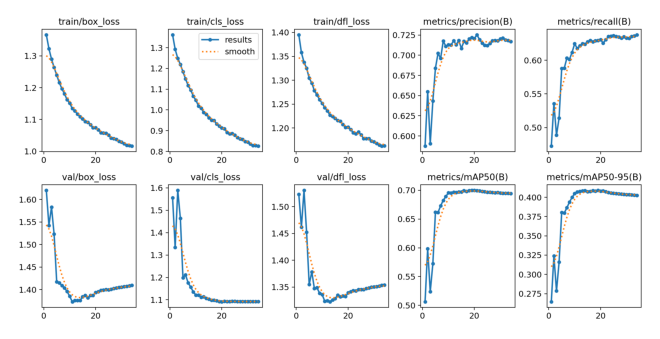

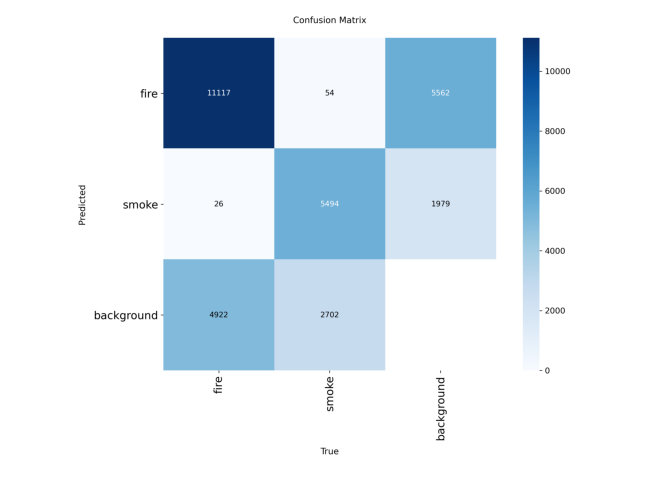

2025-09-21 16:58:23,190 - clearml.storage - INFO - Uploading: 18.27MB from train3/тест 13 batch_size=256, optimizer=AdamW ,  lr0=3e-4, lrf=1, weight_decay=0.0005, patience=15, warmup_epochs = 10, warmup_momentum=0.8, dropout=0.2 Остальные параметры по умолчанию/weights/best.pt


████████████████▉                55% | 10.00/18.27 MB [00:00<00:00, 39.56MB/s]: 

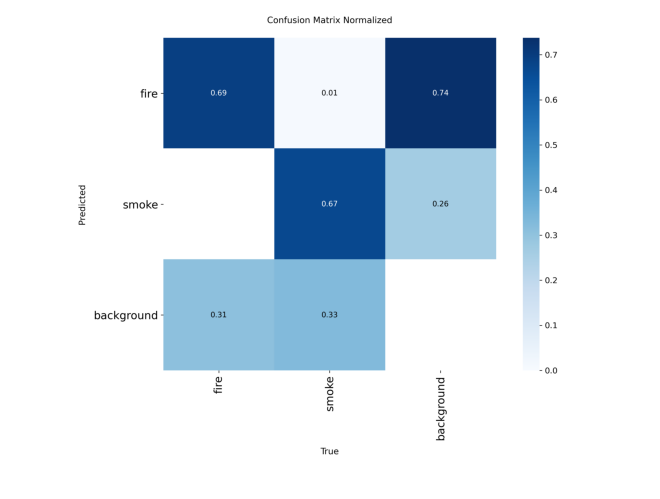

In [ ]:
model = YOLO(pathToModel)

model = model.cuda()

model.train(
    #device=[0],
    data=data,
    name=name,
    project=project,
    
    epochs=epochs,
    imgsz=imgsz,
    val=val,
    batch=batch,
    workers=workers,
    
    
    # lrf=lrf,
    # optimizer=optimizer,
    # lr0=lr0,
    # dropout=dropout,
    # warmup_epochs=warmup_epochs,
    # patience=patience,
    # warmup_momentum=0
    
    optimizer="AdamW",
    lrf=1,
    lr0=3e-4,
    
    patience=15,
    warmup_epochs=10,
    warmup_momentum=0.8,
    weight_decay=0.0005,
    dropout=0.2,
)

In [ ]:
task.close()

[D 2025-09-21 16:58:23.612 MLKernelApp] _pre_run_cell()
███████████████████████████████ 100% | 18.27/18.27 MB [00:01<00:00, 14.09MB/s]: 


In [ ]:
# from ultralytics import YOLO

# model = YOLO("/home/jupyter/datasphere/project/model_training/train_with_wandb/train2/optimizer=AdamW batch=384 lr0=0.005 lrf=0.2 cos_lr=True dropout=0.3 warmup_epochs=7 weight_decay=0.01 close_mosaic=10 Second dataset 3/weights/best.pt")

# data="/home/jupyter/datasphere/project/model_training/sharedDateFile.yaml"
# model.val(data=data)

[D 2025-09-21 17:03:16.731 MLKernelApp] _pre_run_cell()
